<a href="https://colab.research.google.com/github/protzetter/BankingRecommendations/blob/master/BankingProductRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install creme

     |████████████████████████████████| 1.1MB 9.2MB/s 


In [0]:
# define one hot encoders for categorical values
import creme
from creme import preprocessing
one_hot_Age = creme.preprocessing.OneHotEncoder('Age' , sparse=True)
one_hot_Age_Group = creme.preprocessing.OneHotEncoder('Age Group' , sparse=True)
one_hot_Country = creme.preprocessing.OneHotEncoder('Country' , sparse=True)
one_hot_Employer_Category = creme.preprocessing.OneHotEncoder('Employer Category' , sparse=True)
one_hot_Employment_Level = creme.preprocessing.OneHotEncoder('Employment Level' , sparse=True)
one_hot_Income = creme.preprocessing.OneHotEncoder('Income' , sparse=True)
one_hot_Marital_Status = creme.preprocessing.OneHotEncoder('Marital status' , sparse=True)
one_hot_National = creme.preprocessing.OneHotEncoder('National' , sparse=True)
one_hot_Parenthood = creme.preprocessing.OneHotEncoder('Parenthood' , sparse=True)
one_hot_Residence = creme.preprocessing.OneHotEncoder('Residence' , sparse=True)
one_hot_Gender = creme.preprocessing.OneHotEncoder('Gender' , sparse=True)
one_hot_product = creme.preprocessing.OneHotEncoder('Product', sparse = True)


In [0]:
# define a function to encode the input categoroical values as Python classifiers do not work with categorical input
def HotEncodeInput(x):
  out={}
  out.update(one_hot_Country.fit_one(x).transform_one(x))
  out.update(one_hot_Age.fit_one(x).transform_one(x))
  out.update(one_hot_Age_Group.fit_one(x).transform_one(x))
  out.update(one_hot_Employer_Category.fit_one(x).transform_one(x))
  out.update(one_hot_Employment_Level.fit_one(x).transform_one(x))
  out.update(one_hot_Income.fit_one(x).transform_one(x))
  out.update(one_hot_Marital_Status.fit_one(x).transform_one(x))
  out.update(one_hot_National.fit_one(x).transform_one(x))
  out.update(one_hot_Parenthood.fit_one(x).transform_one(x))
  out.update(one_hot_Residence.fit_one(x).transform_one(x))
  return out

In [0]:
# define the model pipeline, this is quite useful
# in this case we have 2 steps, 1. hot encode the input, then apply a one vs all classifier for each class
from creme import compose
from creme import multiclass, linear_model
model = compose.Pipeline([
    ('Hot Encode', compose.FuncTransformer(HotEncodeInput)),
    ('Classifier', multiclass.OneVsRestClassifier(binary_classifier=linear_model.LogisticRegression()))
])

In [7]:
from creme import metrics
from creme import model_selection
from creme import stream
accuracy=metrics.Accuracy()
params = dict(
    target_name='Product',
    )
model_selection.online_score(stream.iter_csv('/content/drive/My Drive/Colab Notebooks/productrecommendations.csv', **params), model, accuracy)

Accuracy: 0.094877

In [8]:
from creme import stream
from creme import metrics

metric=metrics.Accuracy()
#accuracy=metrics.Accuracy()

for xi, yi in stream.iter_csv('/content/drive/My Drive/Colab Notebooks/productrecommendations.csv', target_name='Product'):
    y_pred=model.predict_one(xi)
    print(yi, y_pred)
    #if y_pred != {} and y_pred is not None:
    #metric = metric.update(yi, {'y_pred':'1'} )
    metric = metric.update(yi, y_pred )
      #accuracy = accuracy.update(yi, {'y_pred':'1'} )
    print(metric.get())
    model.fit_one(xi,yi)

PB_001 PB_003
0.0
PB_002 PB_003
0.0
PB_003 PB_003
0.3333333333333333
PB_004 PB_003
0.25
PB_005 PB_003
0.2
PB_006 PB_003
0.16666666666666669
PB_007 PB_003
0.14285714285714288
PB_008 PB_003
0.12500000000000003
PB_009 PB_003
0.11111111111111113
PB_010 PB_003
0.10000000000000002
PB_011 PB_003
0.09090909090909093
PB_012 PB_003
0.08333333333333334
PB_014 PB_003
0.07692307692307693
PB_013 PB_003
0.07142857142857144
PB_001 PB_003
0.06666666666666668
PB_002 PB_003
0.06250000000000001
PB_003 PB_003
0.11764705882352942
PB_004 PB_002
0.11111111111111112
PB_005 PB_003
0.10526315789473685
PB_006 PB_004
0.1
PB_007 PB_003
0.09523809523809525
PB_008 PB_004
0.09090909090909091
PB_009 PB_003
0.08695652173913043
PB_010 PB_002
0.08333333333333333
PB_011 PB_003
0.08
PB_012 PB_003
0.07692307692307693
PB_014 PB_003
0.07407407407407408
PB_013 PB_003
0.07142857142857144
PB_001 PB_003
0.06896551724137932
PB_002 PB_002
0.1
PB_003 PB_002
0.09677419354838711
PB_004 PB_002
0.09375000000000001
PB_005 PB_005
0.1212121

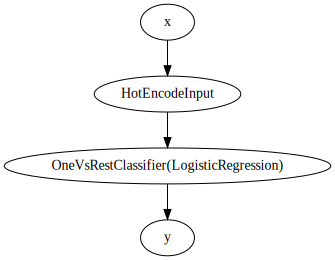

In [9]:
model.draw()

# Nouvelle section